python не был бы так популярен, если бы не библиотеки, расширяющие его функционал для выполнения практически любых задач. В рамках нашей специальности, нам нужно осваивать библиотеки для быстрых операций с массивами данных, построения математических моделей и их оптимизаций и визуализации некоторых материалов.

Этот раздел будет построен следующим образом:

Будет максимально короткое знакомство с библиотекой по типу:

1. Представление
2. 2 - 3 примера использования

Далее перейдем к решению практических задач и исследований, в ходе которых будем обращаться ко всем инструментам python и таким образом осваивая их.

Приведем краткий список тех библиотек, которые будут необходимы:
1. numpy - https://numpy.org/
2. pandas - https://pandas.pydata.org/
3. matplotlib - https://matplotlib.org/
4. sklearn - https://scikit-learn.org/stable/index.html
5. scipy - https://scipy.org/
6. statsmodels - https://www.statsmodels.org/stable/index.html
7. torch - https://pytorch.org/
8. jax - https://docs.jax.dev/en/latest/quickstart.html
9. polars - https://pola.rs/
10. plotly - https://plotly.com/

##### SKLEARN

https://scikit-learn.org/stable/index.html

sklearn сокращенно от 'science-kit learn' -- библиотека для "научных исследований".


Содержит в себе множество инструментов для анализа данных и построения моделей, в том числе и машинного обучения.

Как всегда и прежде -- рекомендуется работать с документацией.

In [24]:
# рассмотрим пример с обычной регрессией

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

lr = LinearRegression()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

mean_not_na = tickers_returns.notna().mean()
mean_not_na = mean_not_na[mean_not_na > 0.99]
tickers = mean_not_na.index

cidx = imbalance.index.intersection(tickers_returns.index)
imbalance_, tickers_returns_ = renorm( imbalance.loc[cidx, tickers]) , renorm( tickers_returns.loc[cidx, tickers] )
cidx_train, cidx_test = cidx[:cidx.shape[0]//10], cidx[cidx.shape[0]//10:]

x_train, x_test = imbalance_.loc[cidx_train], imbalance_.loc[cidx_test]
y_train, y_test = tickers_returns_.loc[cidx_train], tickers_returns_.loc[cidx_test]

imp.fit(x_train)
x_train = imp.transform(x_train)
x_test = imp.transform(x_test)

imp.fit(y_train)
y_train = imp.transform(y_train)
y_test = imp.transform(y_test)

lr.fit(x_train, y_train)
lr.score(x_test, y_test)


-0.07984264477473965

In [25]:
predictions_ = lr.predict(x_test)
alpha = pd.DataFrame(predictions_, index=cidx_test, columns=imbalance_.columns)
alpha = renorm(alpha.ewm(12 * 1).mean())

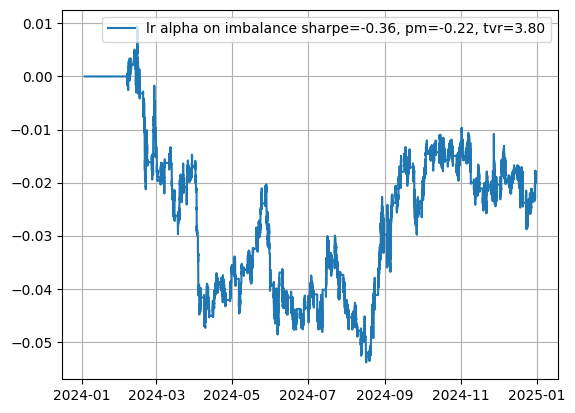

In [26]:
cost = 1

plt.plot(
    get_pnl_with_costs(alpha, tickers_returns, cost=cost), label=f'lr alpha on imbalance {describe_pf(alpha, tickers_returns, cost=cost)}'
)

plt.legend()
plt.grid()

##### SCIPY

scipy (scientific python) -- библиотека, которая содержит фундаментальные алгоритмы для научных вычислений в python.

https://scipy.org/

In [27]:
import scipy

In [28]:
# посмотрим на подмодули которые есть в библиотеке

for submodule in scipy.__all__:
    try:
        print(submodule)
        print(
            '   ',
            getattr(
                getattr(scipy, submodule),
                '__all__')
            )
    except:
        continue

cluster
    ['vq', 'hierarchy']
constants
    ['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', 'gram', 'gravitational_constant', 'h', 'hbar', 'hectare', 'hecto', 'horsepower', 'hour', 'hp', 'inch', 'k', 'kgf', 'kibi', 'kilo', '

In [11]:
# посмотрим игрушечный пример использования -- посчитаем гессиан

import numpy as np

def func(X: np.ndarray) -> np.ndarray:
    return sum(x**2 for x in X)


import scipy.differentiate

hess: scipy._lib._util._RichResult = scipy.differentiate.hessian(func, np.asarray([1,1,1]))
hess

     success: [[ True False False]
               [False  True False]
               [False False  True]]
      status: [[ 0 -1 -1]
               [-1  0 -1]
               [-1 -1  0]]
       error: [[ 3.926e-13  6.340e-13  6.340e-13]
               [ 6.340e-13  3.926e-13  6.340e-13]
               [ 6.340e-13  6.340e-13  3.926e-13]]
        nfev: [[121 165 165]
               [165 121 165]
               [165 165 121]]
         ddf: [[ 2.000e+00  6.284e-13  6.284e-13]
               [ 6.284e-13  2.000e+00  6.284e-13]
               [ 6.284e-13  6.284e-13  2.000e+00]]

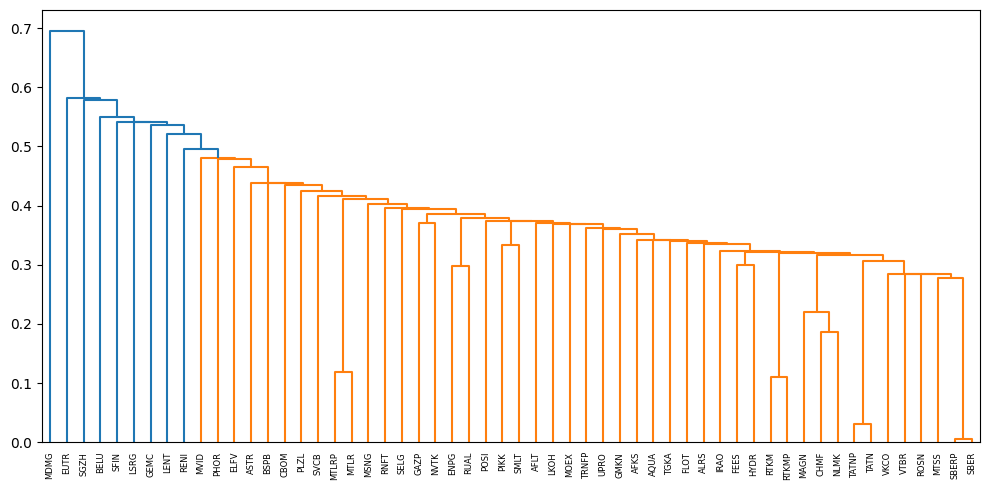

In [13]:
# используем scipy для анализа данных
# построим иерархическую кластеризацию по ретурнам и посмотрим как группируются тикеры

from scipy.cluster import hierarchy

plt.figure(figsize=(10,5))
Z = hierarchy.linkage(tickers_returns[valid_tickers].resample('1D').sum().dropna().T, method='single', metric='correlation')
tree = hierarchy.dendrogram(
    Z, no_plot=False, labels=valid_tickers,
)
leaves = tree['leaves']

# _ = plt.xticks(np.linspace(0, 500, 52), labels=valid_tickers[leaves], rotation=90)

plt.tight_layout()

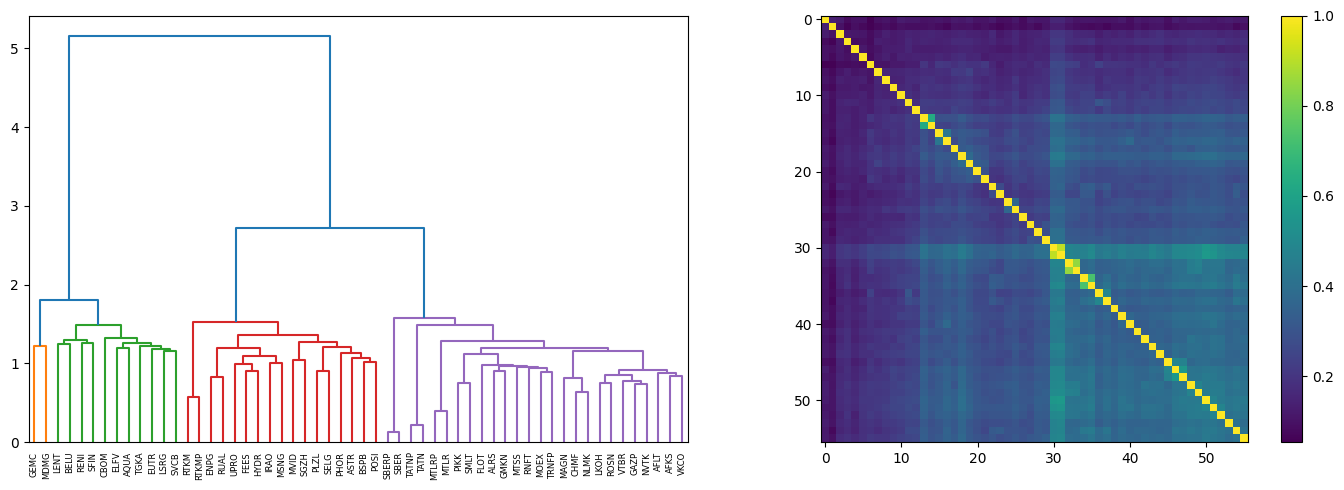

In [14]:
# баровые 5минутные ретурны

corr_df = tickers_returns[valid_tickers].corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

Z = hierarchy.linkage(corr_df, method='ward')
tree = hierarchy.dendrogram(
    Z, no_plot=False, labels=valid_tickers, ax=ax1, color_threshold=1.75
)
leaves = tree['leaves']

im = ax2.imshow(corr_df.iloc[leaves,leaves], colorizer=True)
fig.colorbar(im, orientation='vertical')

plt.tight_layout()

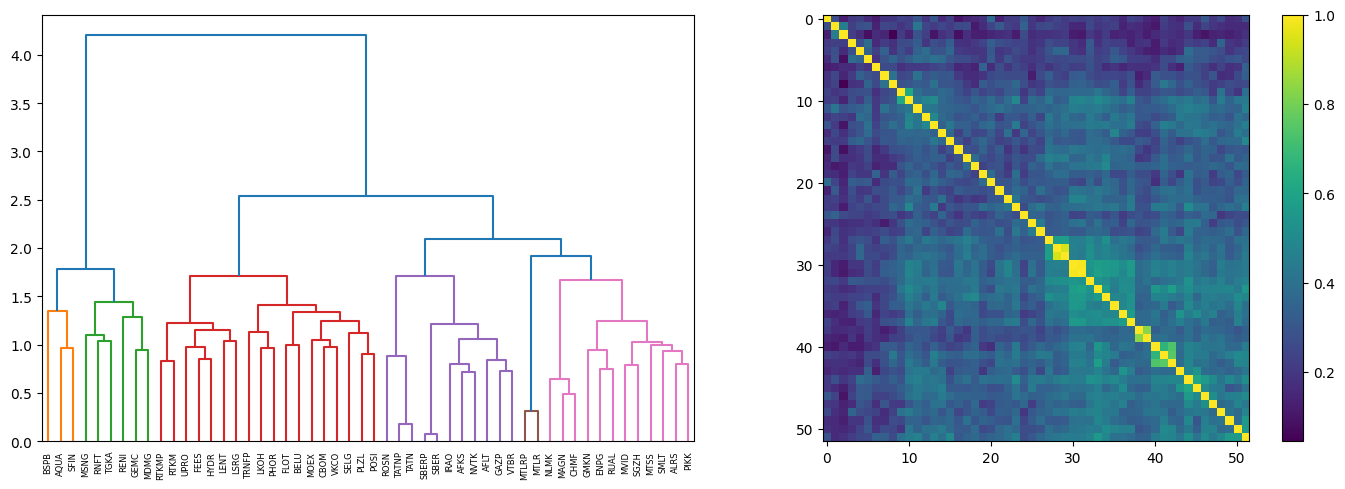

In [245]:
# дневные ретурны

corr_df = tickers_returns.resample('1D').sum()[valid_tickers].corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

Z = hierarchy.linkage(corr_df, method='ward')
tree = hierarchy.dendrogram(
    Z, no_plot=False, labels=valid_tickers, ax=ax1, color_threshold=1.75
)
leaves = tree['leaves']

im = ax2.imshow(corr_df.iloc[leaves,leaves], colorizer=True)
fig.colorbar(im, orientation='vertical')

plt.tight_layout()

In [249]:
# построим простейший портфель и оптимизируем с помощью scipy

In [251]:
data.keys()

dict_keys(['order_cancel_orders', 'order_cancel_orders_b', 'order_cancel_orders_s', 'order_cancel_val', 'order_cancel_val_b', 'order_cancel_val_s', 'order_cancel_vol', 'order_cancel_vol_b', 'order_cancel_vol_s', 'order_cancel_vwap_b', 'order_cancel_vwap_s', 'order_put_orders', 'order_put_orders_b', 'order_put_orders_s', 'order_put_val', 'order_put_val_b', 'order_put_val_s', 'order_put_vol', 'order_put_vol_b', 'order_put_vol_s', 'order_put_vwap_b', 'order_put_vwap_s', 'orderbook_imbalance_val', 'orderbook_imbalance_val_bbo', 'orderbook_imbalance_vol', 'orderbook_imbalance_vol_bbo', 'orderbook_levels_b', 'orderbook_levels_s', 'orderbook_spread_1mio', 'orderbook_spread_bbo', 'orderbook_spread_lv10', 'orderbook_val_b', 'orderbook_val_s', 'orderbook_vol_b', 'orderbook_vol_s', 'orderbook_vwap_b', 'orderbook_vwap_b_1mio', 'orderbook_vwap_s', 'orderbook_vwap_s_1mio', 'trade_disb', 'trade_pr_change', 'trade_pr_close', 'trade_pr_high', 'trade_pr_low', 'trade_pr_open', 'trade_pr_std', 'trade_pr_v

In [11]:

from tqdm import tqdm

correlations: dict[str, pd.DataFrame] = dict()
cross_returns = tickers_returns[valid_tickers].shift(-2)
cross_returns = cross_returns.sub(cross_returns.mean(axis=1), axis=0)

for field, df in tqdm(data.items()):
    # считаем zscore, чтобы получить стационарный ряд
    zscore: pd.DataFrame = df.sub(df.ewm(12 * 24 * 1).mean()).div(df.ewm(12 * 24 * 1).std() + 1e-8)[valid_tickers]
    zscore = zscore.ewm(12 * 24).mean()
    # смотрим корреляцию с ретурнами
    correlations[field]: pd.DataFrame = zscore.corrwith(cross_returns, axis=1).median() # additional shift

100%|██████████| 62/62 [00:09<00:00,  6.24it/s]


In [12]:
sorted_features = dict(
    sorted(
        correlations.items(),
        key=lambda x: -x[1]
    )
)

In [13]:
sorted_features

{'orderbook_imbalance_vol': np.float64(0.006056148586698283),
 'orderbook_imbalance_val': np.float64(0.00598796387084715),
 'trade_sec_pr_low': np.float64(0.005058731935494783),
 'orderbook_val_b': np.float64(0.0049310955733138356),
 'orderbook_vol_b': np.float64(0.004298928208843259),
 'orderbook_vwap_b': np.float64(0.004235382812509933),
 'orderbook_vwap_s': np.float64(0.003764661108716632),
 'order_cancel_vol_s': np.float64(0.003350965448949204),
 'order_put_vol_s': np.float64(0.00316060047239703),
 'order_put_vwap_b': np.float64(0.0031077763967788923),
 'trade_pr_low': np.float64(0.0030804168782974),
 'trade_pr_open': np.float64(0.0030799166532768474),
 'trade_pr_close': np.float64(0.0030461726920121158),
 'order_cancel_val_s': np.float64(0.0030114212587725848),
 'trade_pr_high': np.float64(0.0029353525772257737),
 'orderbook_vwap_b_1mio': np.float64(0.002917502555933472),
 'trade_sec_pr_close': np.float64(0.0029129607243992776),
 'order_put_vwap_s': np.float64(0.002897610286510089

In [15]:
# используем в качестве сигналов признаки которые имеют высокую корреляцию с ретурнами
alphas: dict[str, pd.DataFrame] = dict()

for feature in list(sorted_features.keys())[:10]:
    df = data[feature]
    zscore: pd.DataFrame = df.sub(df.ewm(12 * 24 * 1).mean()).div(df.ewm(12 * 24 * 1).std() + 1e-8)[valid_tickers] * sorted_features[feature]
    alphas[feature] = zscore.copy().ewm(12*24).mean()

In [16]:
from functools import reduce

eqw = reduce(
    lambda x, y: x.add(y, fill_value=0),
    alphas.values()
)
eqw = eqw[valid_tickers].ewm(12 * 4).mean()
eqw = renorm(eqw)

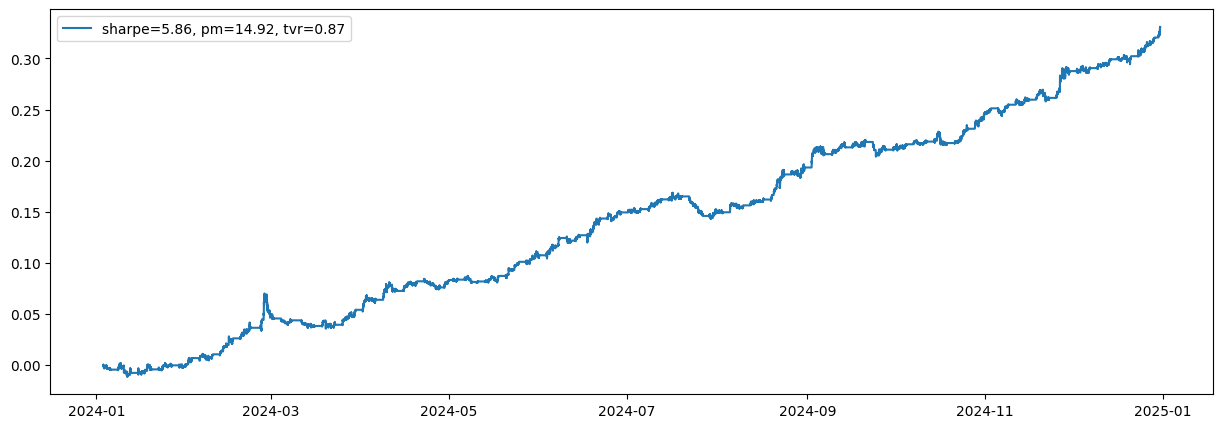

In [17]:
plt.figure(figsize=(15,5))
plt.plot(
    get_pnl_with_costs(
        eqw, tickers_returns, cost=0
    ),
    label=describe_pf(eqw, tickers_returns, cost=0)
)
plt.legend()

In [ ]:
from scipy.optimize import minimize

def loss(X: np.ndarray):
    print(X)
    pf = pd.DataFrame()
    for x, alpha in zip(X, alphas.values()):
        pf = pf.add( x * alpha, fill_value=0 )
    stats = describe_pf(renorm(pf.ewm(12 * 4).mean()), tickers_returns, cost=10, return_as_str=False)['profit_margin']
    print(stats)
    return -stats

ans = minimize(loss, np.ones(7), method='COBYQA', tol=1e-1)

In [558]:
X = ans.x

pf = pd.DataFrame()
for x, alpha in zip(X, alphas.values()):
    pf = pf.add( x * alpha, fill_value=0 )
# stats = describe_pf(renorm(pf.ewm(12 * 4).mean()), tickers_returns, cost=10, return_as_str=False)['sharpe']
# print(stats)
optimized_pf = renorm( pf.ewm(12 * 4).mean().copy().clip(-0.03, 0.03) )

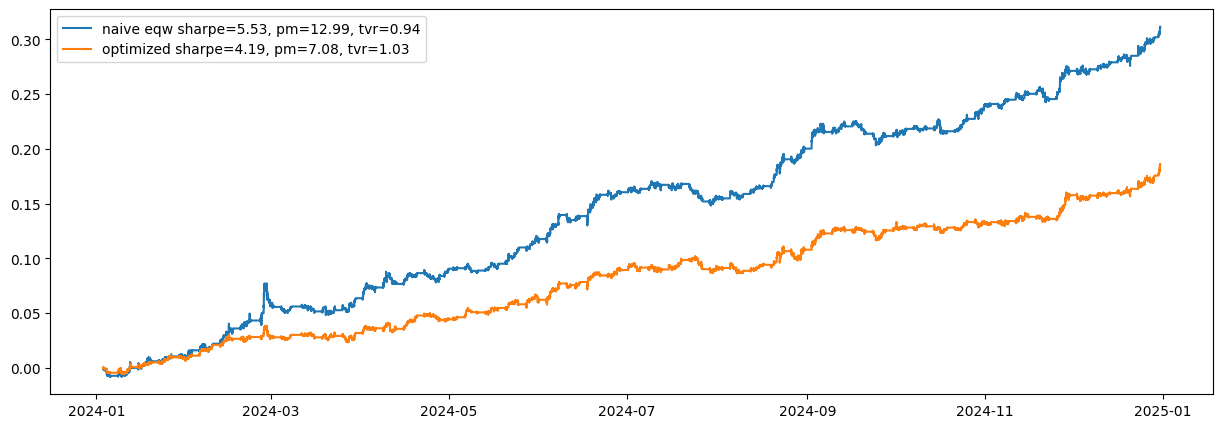

In [559]:
plt.figure(figsize=(15,5))

cost = 0

plt.plot(
    get_pnl_with_costs(
        eqw, tickers_returns, cost=cost
    ),
    label='naive eqw ' + describe_pf(eqw, tickers_returns, cost=cost)
)
plt.plot(
    get_pnl_with_costs(
        optimized_pf, tickers_returns, cost=cost
    ),
    label='optimized ' + describe_pf(optimized_pf, tickers_returns, cost=cost)
)

plt.legend()

PCA-оптимизация портфеля из альф-стратегий:
Найдено 10 альфа-стратегий
Общие тикеры: 56
Общие временные точки: 39206
Матрица доходностей стратегий: (39206, 10)

Результаты PCA-оптимизации:
Количество компонент: 3
Объясненная дисперсия: 0.908
Статистики портфеля: {'sharpe': np.float64(5.145807850152962), 'profit_margin': np.float64(9.96380892715942), 'daily_turnover': np.float64(1.220487453332599)}

Веса стратегий в PCA-портфеле:
  orderbook_imbalance_vol: 0.0049
  orderbook_imbalance_val: -0.0006
  trade_sec_pr_low: 0.1405
  orderbook_val_b: 0.2917
  orderbook_vol_b: 0.2665
  orderbook_vwap_b: 0.1783
  orderbook_vwap_s: 0.1948
  order_cancel_vol_s: 0.2761
  order_put_vol_s: 0.2791
  order_put_vwap_b: 0.1750

Сравнение с равновзвешенным портфелем:
Равновзвешенный портфель: {'sharpe': np.float64(6.785714537103666), 'profit_margin': np.float64(7.883797840882523), 'daily_turnover': np.float64(1.9234317388396782)}
PCA-оптимизированный портфель: {'sharpe': np.float64(5.145807850152962), 'pro

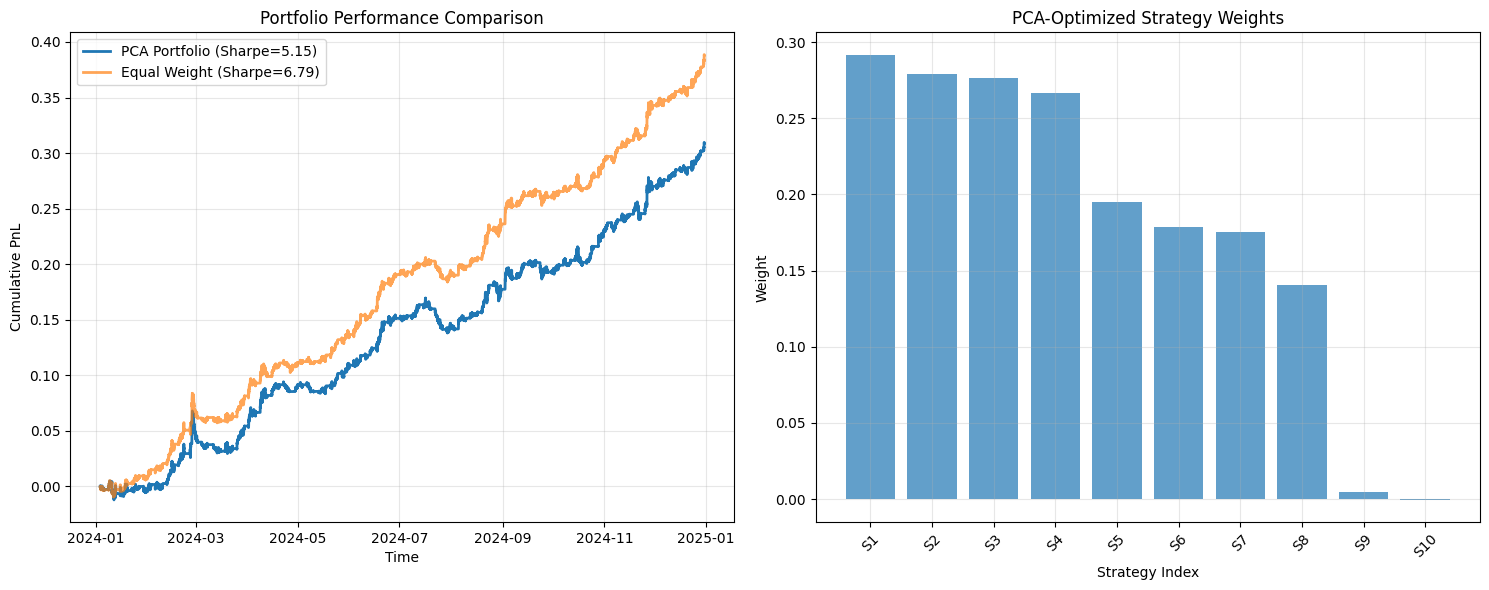


Анализ главных компонент:


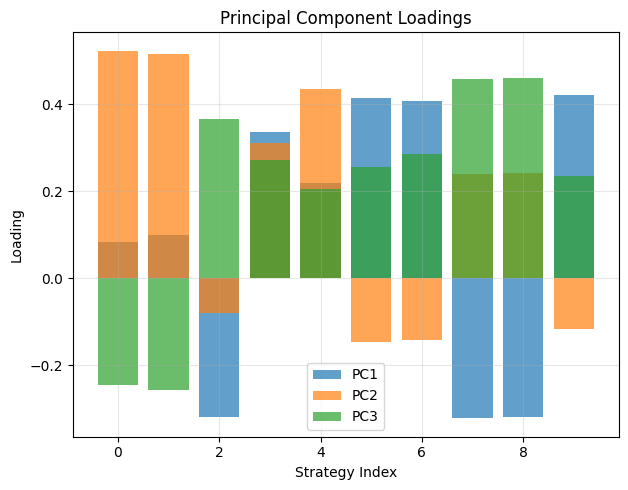

In [46]:
# Задача: реализовать пример с PCA оптимизацией портфеля
# примечание пример подготовлен LLM в файле pca_alphas.py 

In [ ]:
# пример: комбинирование альф с помощью ансамблей для прогнозирования ретурнов

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

def ensemble_alpha_combination(features: pd.DataFrame, returns: pd.Series, 
                             n_splits: int = 5) -> tuple:
    """Combine alpha signals using ensemble methods"""
    
    # Time series cross-validation
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    models = {
        'rf': RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=8),
        'gbm': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    
    predictions = {}
    feature_importance = {}
    
    for name, model in tqdm(models.items(), desc='Training models'):
        if name != 'rf':
            continue
        print(f'Training {name} model')
        preds = []
        importance = []
        all_idx = []
        
        for train_idx, test_idx in tscv.split(features):
            X_train, X_test = features.iloc[train_idx,:], features.iloc[test_idx,:]
            y_train, y_test = returns.iloc[train_idx], returns.iloc[test_idx]
            
            model.fit(X_train, y_train)
            preds.extend(model.predict(X_test))
            all_idx.extend(test_idx)
            importance.append(model.feature_importances_)
        
        predictions[name] = pd.DataFrame(preds, index=features.index[all_idx], columns=[name])
        feature_importance[name] = np.mean(importance, axis=0)
    
    return predictions, feature_importance

mean_ = tickers_returns['2024-01-01':].notna().mean()
tickers = mean_[mean_ > 0.9].index
# tickers = np.random.choice(tickers, size=10, replace=False)
tickers = set(tickers.tolist()) - set(['T', 'VSEH'])
all_predictions = []

for ticker in tqdm(tickers):
    print(f'Processing {ticker}')
    features: pd.DataFrame = pd.concat([
        pf[ticker] for pf in alphas.values()
    ], axis=1).dropna()
    features.columns = alphas.keys()

    returns: pd.Series = tickers_returns[[ticker]].dropna()
    cidx, ccols = features.index.intersection(returns.index), features.columns.intersection(returns.columns)
    features, returns = features.loc[cidx], returns.loc[cidx, ticker]

    predictions, feature_importance = ensemble_alpha_combination(features, returns)
    all_predictions.append(predictions)


In [ ]:
plt.hist(
    predictions['rf'], bins=100, histtype='step', label='rf'
)

plt.hist(
    predictions['gbm'], bins=100, histtype='step', label='gbm'
)

plt.hist(
    returns.loc[predictions['rf'].index], bins=100, histtype='step', label='returns'
)

plt.legend()
plt.grid()

plt.show()

In [121]:
all_predictions_df = [prs['rf'] for prs in all_predictions]

In [122]:
all_predictions = pd.concat(all_predictions_df, axis=1)
all_predictions.columns = tickers

pf = renorm(all_predictions)

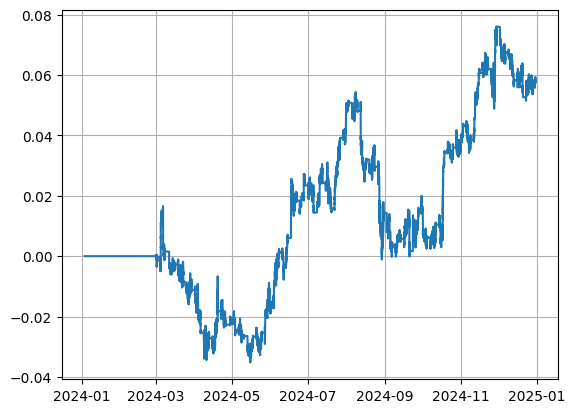

In [127]:

# predictions_mean: pd.DataFrame = predictions['rf']
# predictions_mean.columns = [ticker]
# returns_df: pd.DataFrame = returns.to_frame(name=ticker)


plt.plot(
    get_pnl_with_costs(
        renorm(pf), tickers_returns, cost=0
    )
)
plt.grid()
plt.show()

In [132]:
# пример: решение задачи поиска подразумеваемой волатильности
# примечание: пример подготовлен при помощи LLM


from scipy.special import ndtr
from scipy.optimize import fsolve

def black_scholes(S: float, K: float, T: float, r: float, sigma: float, option_type: str = 'call') -> float:
    """Black-Scholes option pricing"""
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if option_type == 'call':
        price = S*ndtr(d1) - K*np.exp(-r*T)*ndtr(d2)
    else:
        price = K*np.exp(-r*T)*ndtr(-d2) - S*ndtr(-d1)
    
    return price

def implied_volatility(price: float, S: float, K: float, T: float, r: float, option_type: str = 'call') -> float:
    """Calculate implied volatility using Newton-Raphson"""
    def objective(sigma):
        return black_scholes(S, K, T, r, sigma, option_type) - price
    
    return fsolve(objective, 0.3)[0]

# укажем параметры опциона
S = 100
K = 100
T = 1
r = 0.05
option_type = 'call'

# укажем цену опциона
price = 10.

# рассчитаем подразумеваемую волатильность
implied_vol = implied_volatility(price, S, K, T, r, option_type)
print(f"Подразумеваемая волатильность: {implied_vol:.4f}")

Подразумеваемая волатильность: 0.1880


##### STATSMODELS

https://www.statsmodels.org/stable/index.html -- библиотека для работы со статистическими моделями

In [ ]:
# примечание: раздел подготовлен при поддержке LLM

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
# пример с линейной регрессией

from sklearn.datasets import fetch_california_housing


# Загружаем набор данных о жилье в Калифорнии из sklearn
california = fetch_california_housing()

# Создаем pandas DataFrame с данными о жилье и названиями признаков
df = pd.DataFrame(california.data, columns=california.feature_names)

# Добавляем целевую переменную (цены на дома) в DataFrame
df['PRICE'] = california.target

# Выбираем подвыборку из 1000 наблюдений для более быстрых вычислений
# Используем random_state=42 для воспроизводимых результатов
df_sample = df.sample(n=1000, random_state=42)

# Подгоняем модель линейной регрессии, используя формульный API statsmodels
# Прогнозируем цены на дома на основе медианного дохода, среднего количества комнат и средней заселенности
model = smf.ols('PRICE ~ MedInc + AveRooms + AveOccup', data=df_sample).fit()

# Отображаем сводку модели с коэффициентами, статистикой и диагностикой
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     396.0
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.83e-169
Time:                        17:22:04   Log-Likelihood:                -1178.0
No. Observations:                1000   AIC:                             2364.
Df Residuals:                     996   BIC:                             2384.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9159      0.127     15.141      0.0

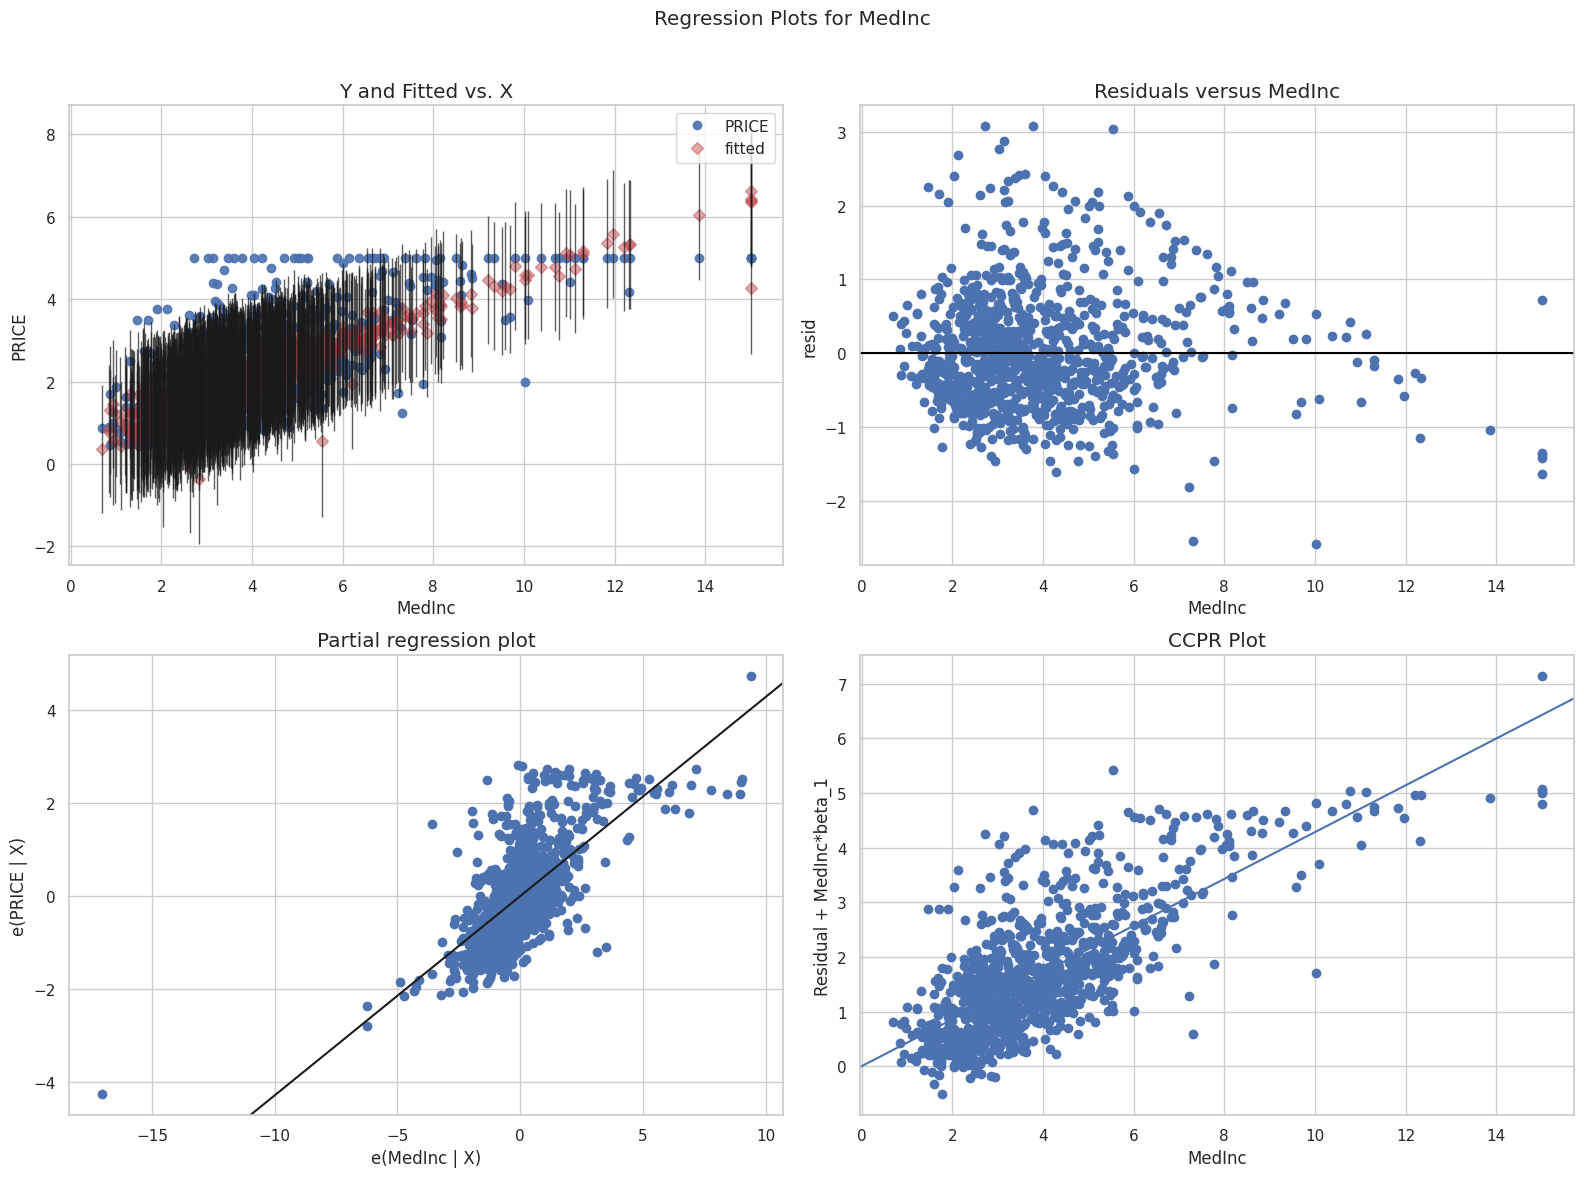

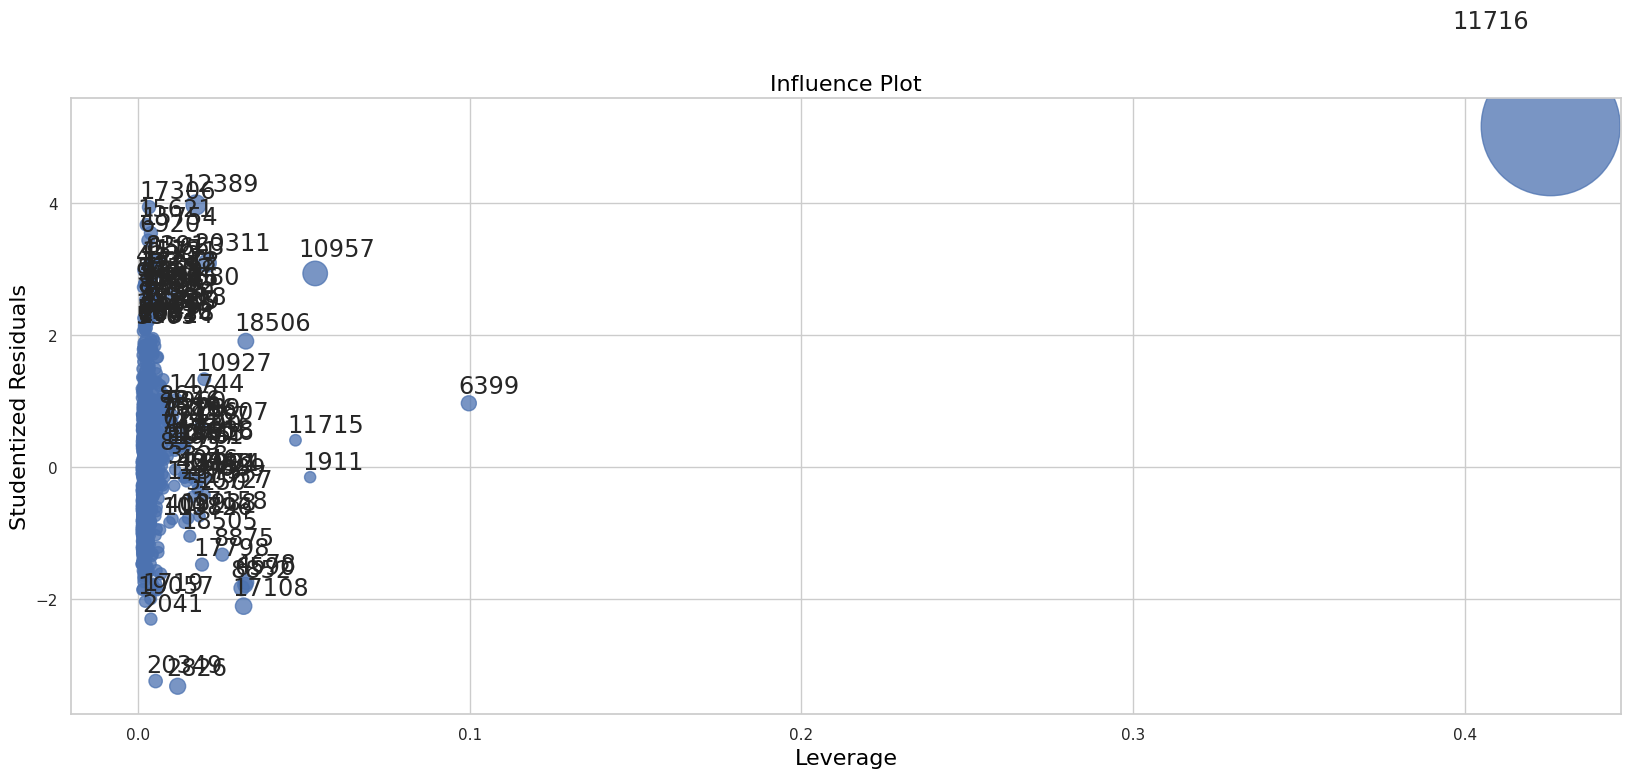

In [3]:
# проанализируем полученную модель

# Создаем график регрессии для переменной MedInc
fig = plt.figure(figsize=(16, 12))
sm.graphics.plot_regress_exog(model, 'MedInc', fig=fig)
plt.show()

# Создаем график влияния наблюдений с критерием Кука
# Увеличиваем размер фигуры для лучшей читаемости
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sm.graphics.influence_plot(model, criterion='cooks', ax=ax, size=100)
plt.show()

In [7]:
# Анализ доходности портфелей с разными стратегиями альфа-факторов
# Устанавливаем seed для воспроизводимости результатов
np.random.seed(42)

# Симулируем рыночные данные для трех различных стратегий:
# - Momentum: стратегия следования за трендом (положительная доходность)
# - Mean Reversion: стратегия возврата к среднему (отрицательная доходность)  
# - Market Neutral: нейтральная к рынку стратегия (близкая к нулю)
n_obs = 252  # Количество торговых дней в году

# Создаем временные ряды доходностей для каждой стратегии
momentum_returns = np.random.normal(0.001, 0.02, n_obs)  # Ежедневная доходность ~0.1%, волатильность 2%
mean_reversion_returns = np.random.normal(-0.0005, 0.015, n_obs)  # Ежедневная доходность ~-0.05%, волатильность 1.5%
market_neutral_returns = np.random.normal(0.0001, 0.01, n_obs)  # Ежедневная доходность ~0.01%, волатильность 1%

# Создаем DataFrame с доходностями стратегий
df_strategies = pd.DataFrame({
    'returns': np.concatenate([momentum_returns, mean_reversion_returns, market_neutral_returns]),
    'strategy': ['Momentum']*n_obs + ['Mean_Reversion']*n_obs + ['Market_Neutral']*n_obs
})

# Подгоняем модель линейной регрессии для анализа различий в доходности между стратегиями
# Это эквивалентно однофакторному дисперсионному анализу доходностей
strategy_model = smf.ols('returns ~ strategy', data=df_strategies).fit()

# Выполняем дисперсионный анализ и получаем таблицу ANOVA
# Параметр typ=2 означает использование суммы квадратов типа II
anova_table = sm.stats.anova_lm(strategy_model, typ=2)

# Выводим результаты дисперсионного анализа доходностей стратегий
print("ANOVA анализ доходности альфа-стратегий:")
print(anova_table)

# Дополнительно выводим описательную статистику по группам
print("\nОписательная статистика доходности по стратегиям:")
print(df_strategies.groupby('strategy')['returns'].describe())

ANOVA анализ доходности альфа-стратегий:
            sum_sq     df         F    PR(>F)
strategy  0.000330    2.0  0.707498  0.493203
Residual  0.175609  753.0       NaN       NaN

Описательная статистика доходности по стратегиям:
                count      mean       std       min       25%       50%  \
strategy                                                                  
Market_Neutral  252.0 -0.000668  0.009964 -0.026869 -0.007474 -0.000463   
Mean_Reversion  252.0 -0.000121  0.015038 -0.049119 -0.011026 -0.000384   
Momentum        252.0  0.000925  0.019344 -0.051395 -0.012711  0.002184   

                     75%       max  
strategy                            
Market_Neutral  0.005822  0.026424  
Mean_Reversion  0.009745  0.045683  
Momentum        0.012861  0.078055  


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -267.731
Date:                Wed, 02 Jul 2025   AIC                            541.461
Time:                        17:34:44   BIC                            551.341
Sample:                             0   HQIC                           545.460
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4893      0.849      0.577      0.564      -1.174       2.153
ma.L1         -0.5489      0.802     -0.684      0.494      -2.121       1.023
sigma2         0.8632      0.08

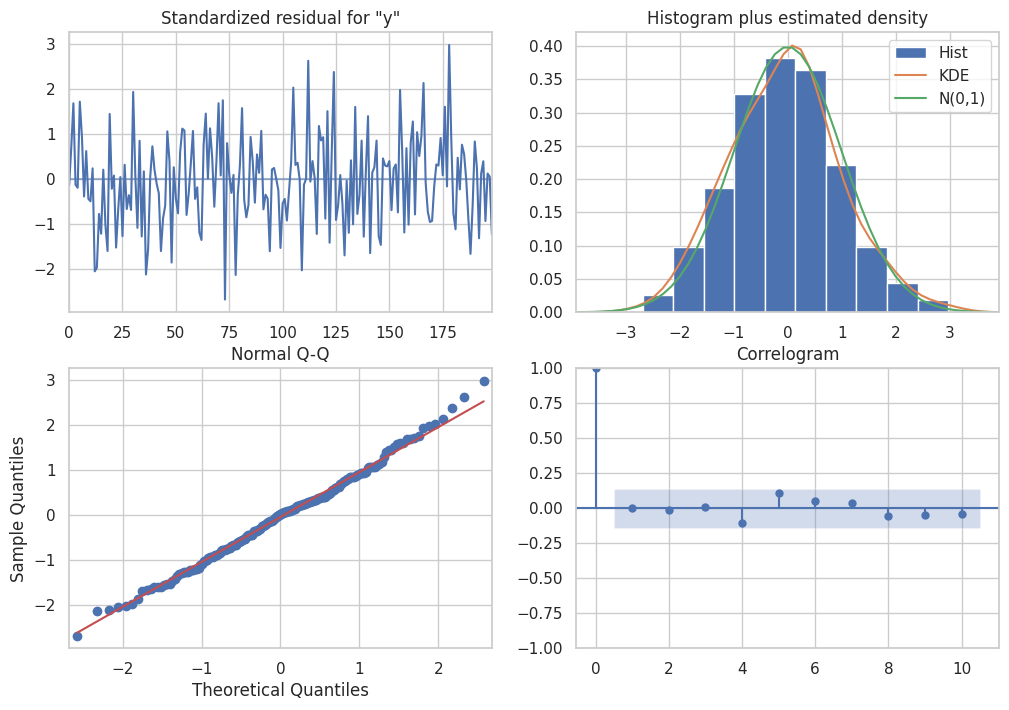

In [11]:
# Пример модели ARIMA
np.random.seed(42)
n = 200
y = np.cumsum(np.random.normal(size=n))
model_arima = sm.tsa.ARIMA(y, order=(1,1,1)).fit()
print("ARIMA Model Summary:")
print(model_arima.summary())
model_arima.plot_diagnostics(figsize=(12,8))
plt.show()


ARIMA Model Selection
ARIMA(0,0,0) - AIC: 1348.70, BIC: 1355.30
ARIMA(0,0,1) - AIC: 1133.19, BIC: 1143.09
ARIMA(0,0,2) - AIC: 1031.41, BIC: 1044.60
ARIMA(0,0,3) - AIC: 943.90, BIC: 960.39
ARIMA(0,1,0) - AIC: 785.80, BIC: 789.09
ARIMA(0,1,1) - AIC: 787.43, BIC: 794.02
ARIMA(0,1,2) - AIC: 789.12, BIC: 799.00
ARIMA(0,1,3) - AIC: 791.07, BIC: 804.25
ARIMA(0,2,0) - AIC: 927.28, BIC: 930.57
ARIMA(0,2,1) - AIC: 790.14, BIC: 796.72
ARIMA(0,2,2) - AIC: 791.84, BIC: 801.71
ARIMA(0,2,3) - AIC: 793.57, BIC: 806.72
ARIMA(1,0,0) - AIC: 793.34, BIC: 803.24
ARIMA(1,0,1) - AIC: 795.19, BIC: 808.39
ARIMA(1,0,2) - AIC: 797.07, BIC: 813.57
ARIMA(1,0,3) - AIC: 798.92, BIC: 818.71
ARIMA(1,1,0) - AIC: 787.46, BIC: 794.05
ARIMA(1,1,1) - AIC: 789.18, BIC: 799.06
ARIMA(1,1,2) - AIC: 788.91, BIC: 802.08
ARIMA(1,1,3) - AIC: 790.81, BIC: 807.28
ARIMA(1,2,0) - AIC: 872.25, BIC: 878.82
ARIMA(1,2,1) - AIC: 791.86, BIC: 801.73
ARIMA(1,2,2) - AIC: 792.81, BIC: 805.96
ARIMA(1,2,3) - AIC: 793.35, BIC: 809.80
ARIMA(2,0,0

/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,2) - AIC: 787.27, BIC: 803.74
ARIMA(2,1,3) - AIC: 792.90, BIC: 812.66
ARIMA(2,2,0) - AIC: 845.58, BIC: 855.45
ARIMA(2,2,1) - AIC: 793.61, BIC: 806.77
ARIMA(2,2,2) - AIC: 793.25, BIC: 809.69
ARIMA(2,2,3) - AIC: 792.69, BIC: 812.42
ARIMA(3,0,0) - AIC: 797.08, BIC: 813.58
ARIMA(3,0,1) - AIC: 796.72, BIC: 816.51


/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,0,2) - AIC: 795.61, BIC: 818.70
ARIMA(3,0,3) - AIC: 800.76, BIC: 827.15
ARIMA(3,1,0) - AIC: 791.15, BIC: 804.32
ARIMA(3,1,1) - AIC: 790.62, BIC: 807.08


/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,2) - AIC: 788.96, BIC: 808.72
ARIMA(3,1,3) - AIC: 789.68, BIC: 812.73
ARIMA(3,2,0) - AIC: 841.20, BIC: 854.36
ARIMA(3,2,1) - AIC: 795.58, BIC: 812.03
ARIMA(3,2,2) - AIC: 795.03, BIC: 814.76
ARIMA(3,2,3) - AIC: 793.40, BIC: 816.42

Лучшая модель по AIC: ARIMA(0, 1, 0) (AIC: 785.80)
Лучшая модель по BIC: ARIMA(0, 1, 0) (BIC: 789.09)

Детальная информация о лучшей модели ARIMA(0, 1, 0):
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -391.898
Date:                Wed, 02 Jul 2025   AIC                            785.797
Time:                        17:36:44   BIC                            789.090
Sample:                             0   HQIC                           787.130
                                - 200                                         
Covariance Type:                  opg             

/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


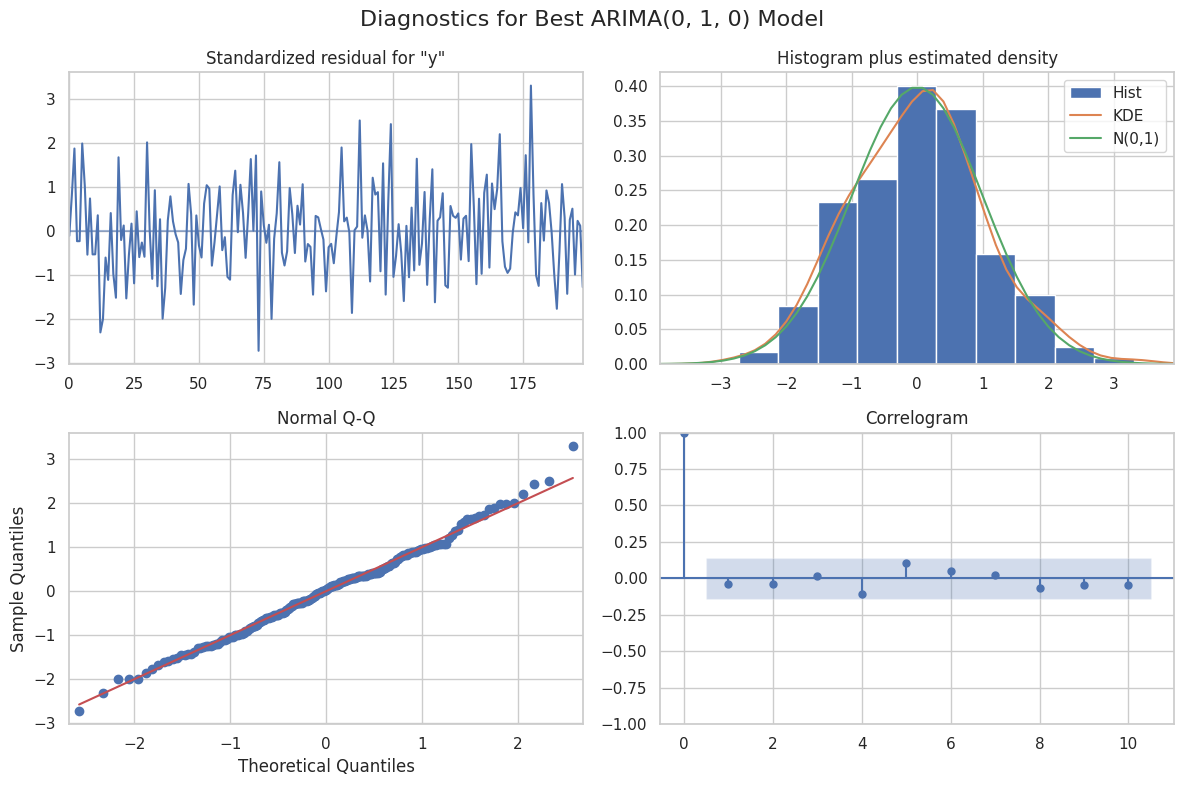

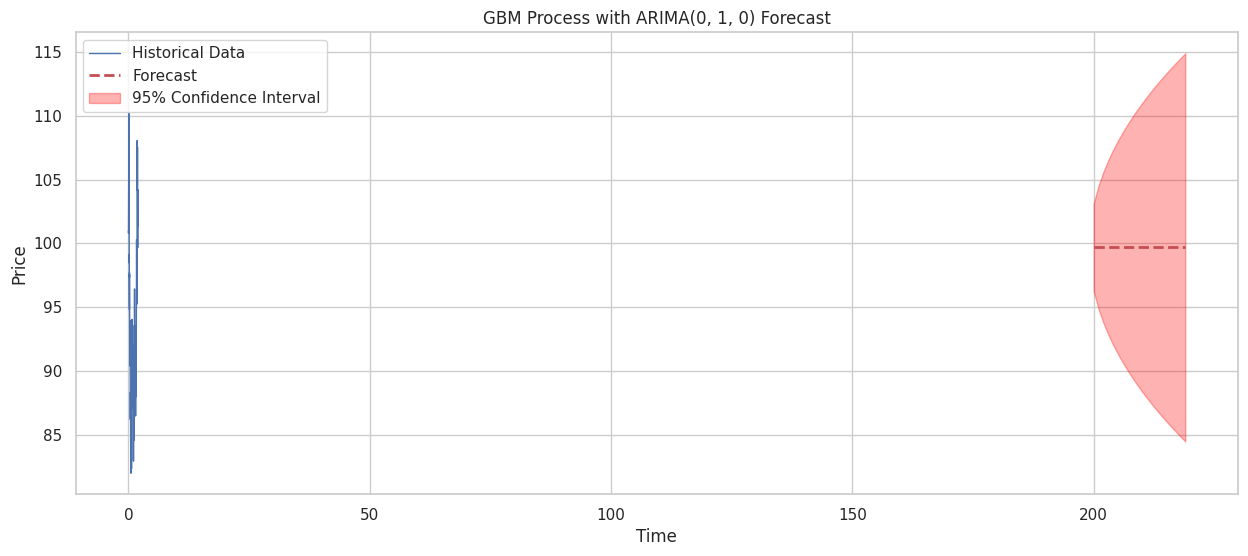

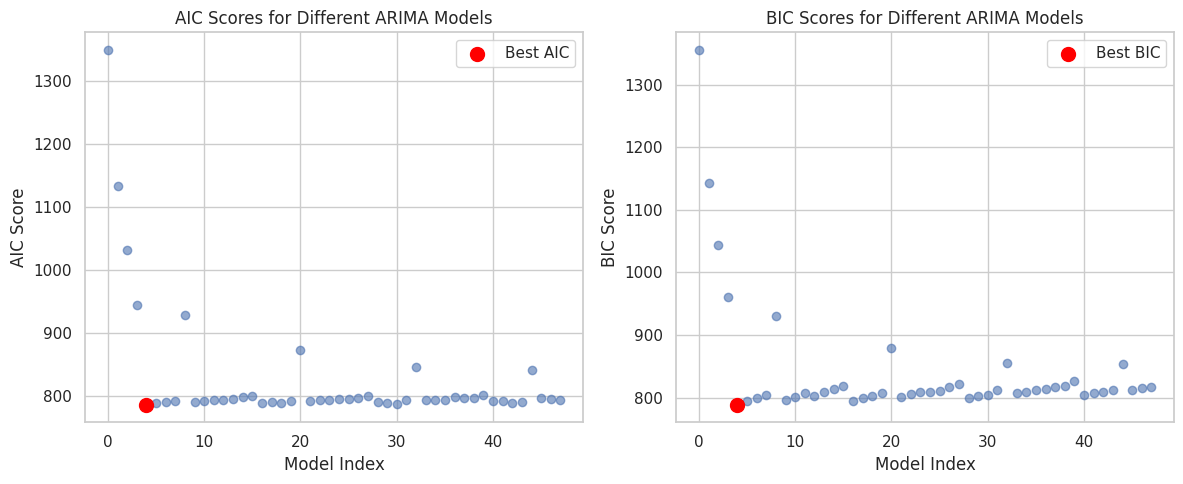

In [13]:
# пример для подгонки модели ARIMA к процессу GBM
# Подгоняем несколько ARIMA моделей и находим лучшую
print("\n" + "="*50)
print("ARIMA Model Selection")
print("="*50)

# Определяем диапазон параметров для перебора
p_values = range(0, 4)  # AR порядок
d_values = range(0, 3)  # Порядок дифференцирования
q_values = range(0, 4)  # MA порядок

# Создаем список для хранения результатов
models = []
aic_scores = []
bic_scores = []

# Перебираем различные комбинации параметров ARIMA
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Подгоняем модель ARIMA
                model = sm.tsa.ARIMA(S, order=(p, d, q)).fit()
                
                # Сохраняем результаты
                models.append((p, d, q))
                aic_scores.append(model.aic)
                bic_scores.append(model.bic)
                
                print(f"ARIMA({p},{d},{q}) - AIC: {model.aic:.2f}, BIC: {model.bic:.2f}")
                
            except:
                # Пропускаем модели, которые не сходятся
                continue

# Находим лучшие модели по AIC и BIC
best_aic_idx = np.argmin(aic_scores)
best_bic_idx = np.argmin(bic_scores)

print(f"\nЛучшая модель по AIC: ARIMA{models[best_aic_idx]} (AIC: {aic_scores[best_aic_idx]:.2f})")
print(f"Лучшая модель по BIC: ARIMA{models[best_bic_idx]} (BIC: {bic_scores[best_bic_idx]:.2f})")

# Подгоняем лучшую модель по AIC
best_model = sm.tsa.ARIMA(S, order=models[best_aic_idx]).fit()

print(f"\nДетальная информация о лучшей модели ARIMA{models[best_aic_idx]}:")
print(best_model.summary())

# Строим диагностические графики для лучшей модели
best_model.plot_diagnostics(figsize=(12, 8))
plt.suptitle(f'Diagnostics for Best ARIMA{models[best_aic_idx]} Model', fontsize=16)
plt.tight_layout()
plt.show()

# Прогнозирование с лучшей моделью
forecast_steps = 20
forecast = best_model.forecast(steps=forecast_steps)
forecast_conf = best_model.get_forecast(steps=forecast_steps).conf_int()

# График прогноза
plt.figure(figsize=(15, 6))
plt.plot(t, S, 'b-', label='Historical Data', linewidth=1)
plt.plot(np.arange(len(t), len(t) + forecast_steps), forecast, 'r--', label='Forecast', linewidth=2)
plt.fill_between(np.arange(len(t), len(t) + forecast_steps), 
                 forecast_conf[:, 0], forecast_conf[:, 1], 
                 alpha=0.3, color='red', label='95% Confidence Interval')
plt.title(f'GBM Process with ARIMA{models[best_aic_idx]} Forecast')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Сравнение критериев качества моделей
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(aic_scores)), aic_scores, alpha=0.6)
plt.scatter(best_aic_idx, aic_scores[best_aic_idx], color='red', s=100, label='Best AIC')
plt.xlabel('Model Index')
plt.ylabel('AIC Score')
plt.title('AIC Scores for Different ARIMA Models')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(range(len(bic_scores)), bic_scores, alpha=0.6)
plt.scatter(best_bic_idx, bic_scores[best_bic_idx], color='red', s=100, label='Best BIC')
plt.xlabel('Model Index')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Different ARIMA Models')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -174.31
Date:                Wed, 02 Jul 2025   Deviance:                       138.39
Time:                        17:37:34   Pearson chi2:                     135.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8308
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5103      0.086      5.916      0.0

/home/dmitry/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


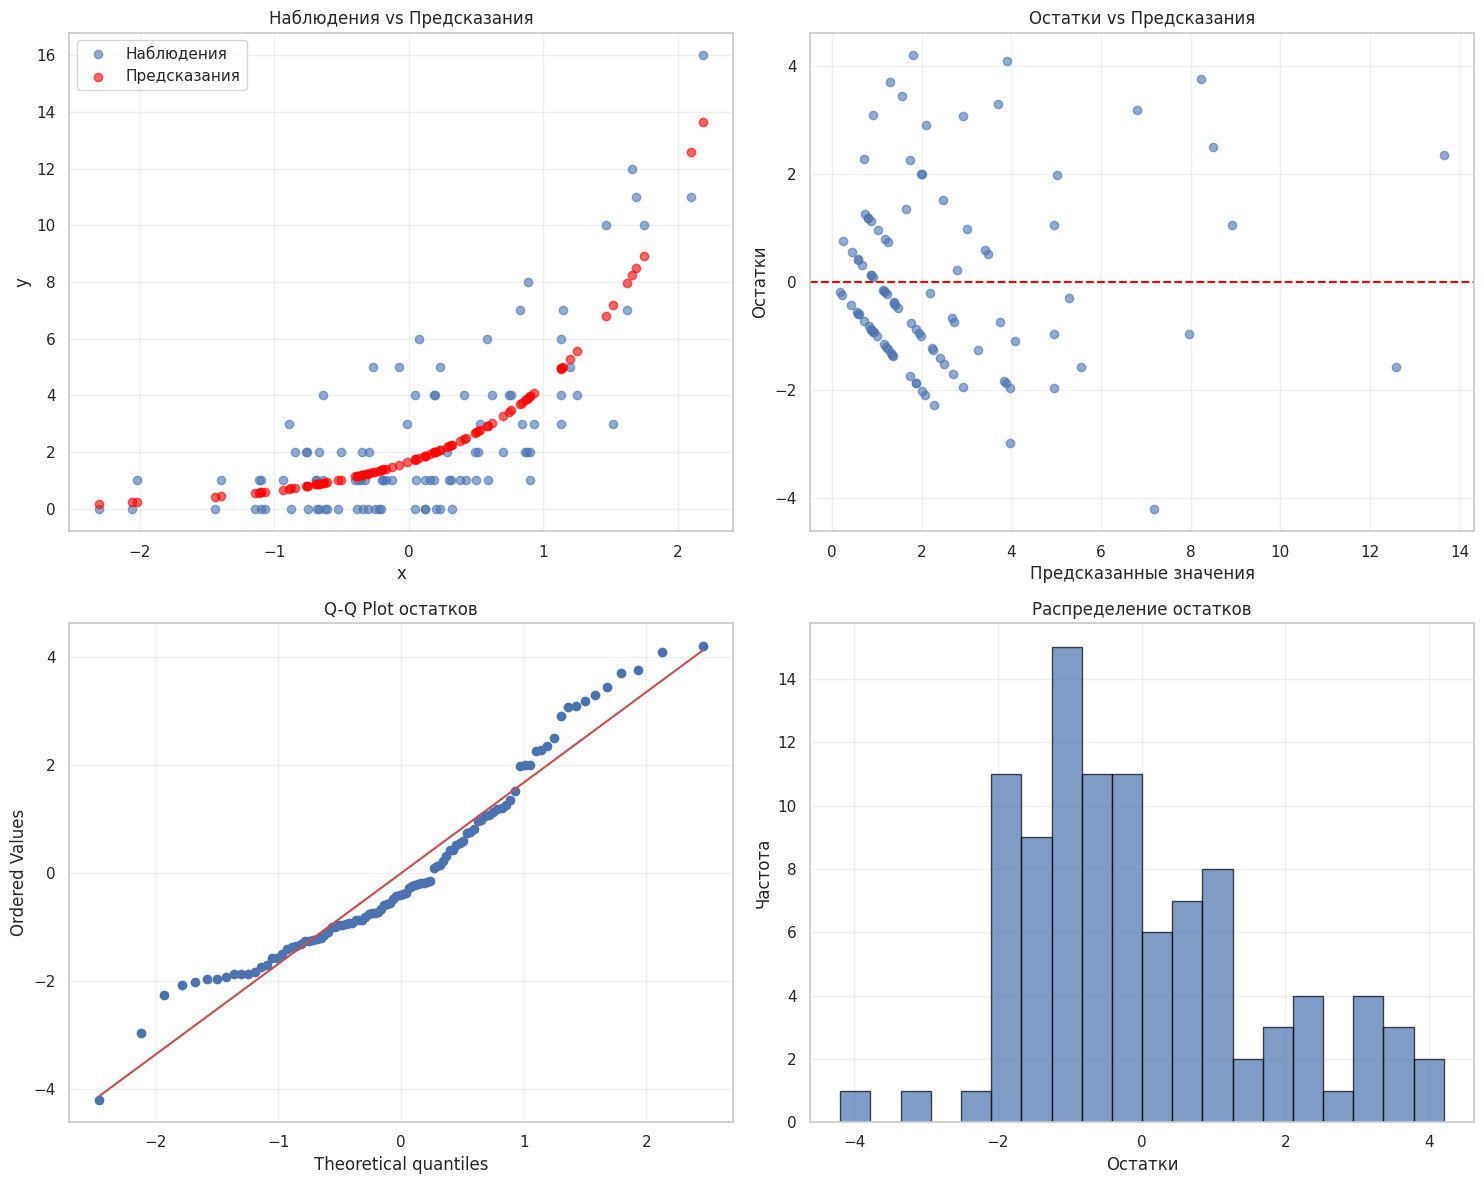


Анализ коэффициентов:
Коэффициент при x: 0.9624
Стандартная ошибка: 0.0739
Z-статистика: 13.0208
P-значение: 0.0000

Проверка качества модели:
Количество наблюдений: 100
Степени свободы остатков: 98
Логарифм правдоподобия: -174.31


In [14]:
# Генерация данных для модели Пуассона
np.random.seed(1)
df_glm = pd.DataFrame({
    'x': np.random.normal(size=100)  # Предиктор из нормального распределения
})
df_glm['y'] = np.random.poisson(lam=np.exp(0.5 + 0.9*df_glm['x']))  # Зависимая переменная из распределения Пуассона

# Подгонка обобщенной линейной модели (GLM) с распределением Пуассона
glm_model = smf.glm('y ~ x', data=df_glm, family=sm.families.Poisson()).fit()
print(glm_model.summary())

# Дополнительная статистика модели
print(f"\nСтатистика модели GLM:")
print(f"AIC: {glm_model.aic:.2f}")
print(f"BIC: {glm_model.bic:.2f}")
print(f"Deviance: {glm_model.deviance:.2f}")
print(f"Pearson Chi-squared: {glm_model.pearson_chi2:.2f}")
print(f"Pseudo R-squared: {glm_model.pseudo_rsquared():.4f}")

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Исходные данные и предсказания
axes[0, 0].scatter(df_glm['x'], df_glm['y'], alpha=0.6, label='Наблюдения')
axes[0, 0].scatter(df_glm['x'], glm_model.fittedvalues, color='red', alpha=0.6, label='Предсказания')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_title('Наблюдения vs Предсказания')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Остатки
residuals = df_glm['y'] - glm_model.fittedvalues
axes[0, 1].scatter(glm_model.fittedvalues, residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Предсказанные значения')
axes[0, 1].set_ylabel('Остатки')
axes[0, 1].set_title('Остатки vs Предсказания')
axes[0, 1].grid(True, alpha=0.3)

# График 3: Q-Q plot для остатков
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot остатков')
axes[1, 0].grid(True, alpha=0.3)

# График 4: Гистограмма остатков
axes[1, 1].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Остатки')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Распределение остатков')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ коэффициентов
print(f"\nАнализ коэффициентов:")
print(f"Коэффициент при x: {glm_model.params['x']:.4f}")
print(f"Стандартная ошибка: {glm_model.bse['x']:.4f}")
print(f"Z-статистика: {glm_model.tvalues['x']:.4f}")
print(f"P-значение: {glm_model.pvalues['x']:.4f}")

# Проверка качества модели
print(f"\nПроверка качества модели:")
print(f"Количество наблюдений: {glm_model.nobs}")
print(f"Степени свободы остатков: {glm_model.df_resid}")
print(f"Логарифм правдоподобия: {glm_model.llf:.2f}")